#  Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports for Sentiment Analysis
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kianaranjkesh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Initial imports for Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl

# Initial imports for Named Entity Recognition
import spacy
from spacy import displacy


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv(
    "NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(
    api_key=api_key)


In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")


In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en")


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass

# Creating a DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...
3,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...
4,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...


In [8]:
 #Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...
1,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...
2,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...
3,0.0000,0.000,1.000,0.000,Representations of cryptocurrencies Bitcoin an...
4,0.3400,0.000,0.895,0.105,Cryptocurrencies spiked Monday after Amazon li...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.019345,0.059750,0.881750,0.058500
std,0.484055,0.090311,0.101771,0.058633
min,-0.827100,0.000000,0.653000,0.000000
25%,-0.405525,0.000000,0.836000,0.000000
50%,0.000000,0.000000,0.906000,0.056000
75%,0.315000,0.088250,0.940000,0.092500
max,0.726400,0.287000,1.000000,0.178000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.000000,20.000000
mean,0.209565,0.01345,0.922800,0.063750
std,0.331383,0.02766,0.081637,0.075861
min,-0.340000,0.00000,0.782000,0.000000
25%,0.000000,0.00000,0.842750,0.000000
50%,0.000000,0.00000,0.933500,0.000000
75%,0.528675,0.00000,1.000000,0.149250
max,0.771700,0.07200,1.000000,0.194000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = stopwords.words("english")

# Expand the default stopwords list if necessary
sw.append("seen")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kianaranjkesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    text_clean = regex.sub(' ', text)    
   
    # Create a tokenized list of the words
    words = word_tokenize(text_clean)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase    
    words = [word.lower() for word in words]
    
    # Remove the stop words
    words = [word for word in words if word not in sw]    
    
    return tokens

In [14]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kianaranjkesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kianaranjkesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:

# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)

# Alternate to the above line
# bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and...","[Like, Dogecoin, devotee, the, mayor, of, Reno..."
1,-0.5719,0.184,0.705,0.111,Filed under:\r\nThe supply chain attack has re...,"[Filed, under, The, supply, chain, attack, ha,..."
2,-0.6124,0.143,0.857,0.000,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightGetty, Images, The, gang, beh..."
3,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...,"[To, get, a, roundup, of, TechCrunchs, biggest..."
4,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[While, retail, investor, grew, more, comforta..."


In [16]:

# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)

# Alternate to the above line
# ethereum_df['tokens'] = [tokenizer(text) for text in ethereum_df['text']]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.3612,0.000,0.925,0.075,There are many blockchain platforms competing ...,"[There, are, many, blockchain, platform, compe..."
1,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...,"[Blockchain, infrastructure, startup, are, hea..."
2,0.7264,0.000,0.836,0.164,While retail investors grew more comfortable b...,"[While, retail, investor, grew, more, comforta..."
3,0.0000,0.000,1.000,0.000,Representations of cryptocurrencies Bitcoin an...,"[Representations, of, cryptocurrencies, Bitcoi..."
4,0.3400,0.000,0.895,0.105,Cryptocurrencies spiked Monday after Amazon li...,"[Cryptocurrencies, spiked, Monday, after, Amaz..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df['text'])
bitcoin_tokenized = tokenizer(bitcoin_text)
bitcoin_tokenized = [word.lower() for word in bitcoin_tokenized if word.lower() not in sw]
bigrams = ngrams(bitcoin_tokenized, n=2)
Counter(bigrams).most_common(10)

[(('reuters', 'dado'), 6),
 (('illustration', 'taken'), 5),
 (('dado', 'ruvic'), 5),
 (('july', 'reuters'), 4),
 (('reuters', 'bitcoin'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'front'), 3),
 (('char', 'reuters'), 3),
 (('ruvic', 'illustration'), 3)]

In [19]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(ethereum_df['text'])
ethereum_tokenized = tokenizer(ethereum_text)
ethereum_tokenized = [word.lower() for word in ethereum_tokenized if word.lower() not in sw]
bigrams = ngrams(ethereum_tokenized, n=2)
Counter(bigrams).most_common(10)

[(('illustration', 'taken'), 5),
 (('cryptocurrency', 'ethereum'), 5),
 (('bitcoin', 'ethereum'), 4),
 (('char', 'representations'), 4),
 (('taken', 'june'), 4),
 (('june', 'reuters'), 4),
 (('reuters', 'dado'), 4),
 (('ethereum', 'network'), 4),
 (('cryptocurrencies', 'bitcoin'), 3),
 (('placed', 'pc'), 3)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_tokenized, N=10)


[('char', 20),
 ('reuters', 13),
 ('bitcoin', 12),
 ('illustration', 9),
 ('attack', 7),
 ('ha', 6),
 ('dado', 6),
 ('july', 5),
 ('world', 5),
 ('taken', 5)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_tokenized, N=10)


[('char', 20),
 ('ethereum', 16),
 ('reuters', 9),
 ('cryptocurrencies', 6),
 ('illustration', 6),
 ('cryptocurrency', 6),
 ('bitcoin', 5),
 ('taken', 5),
 ('network', 5),
 ('blockchain', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

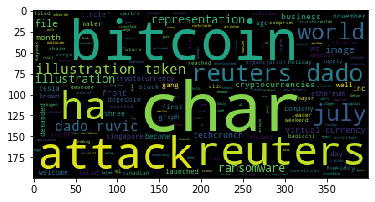

In [23]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_tokenized)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

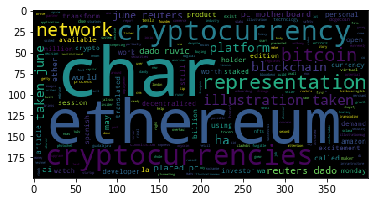

In [24]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum_tokenized)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
#Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 4.1 MB/s eta 0:00:01     |█████████████████████████▍      | 10.8 MB 4.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_text

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars] image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars] To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized applica

In [28]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [30]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
copyrightGetty Images PERSON
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
SINGAPORE GPE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
James Martin/CNET PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
REUTERS ORG
Dado Ruvic/Illustration
 PERSON
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_text


'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars] Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] Representations of cryptocurrencies Bitcoin and Ethereum are placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ruvic/IllustrationAug 3 (Reuters) - The Ethereum platform… [+2412 chars] Cryptocurrencies spiked Monday after Amazon listed an open job for a digital currency and blockchain product lead.\xa0\r\nAmazon is known f

In [32]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [34]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Hackaday DATE
Proof of Work WORK_OF_ART
Bitcoin, Ethereum ORG
Polygon ORG
$100 million MONEY
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo 

---